# 1.Predicting House Prices: Exploratory Data Analysis and Linear Regression Modeling


In the ever-evolving world of technology, machine learning has become a powerful tool to tackle various real-world challenges. One such application is predicting house prices using linear regression for real estate. The ability to forecast property values can immensely benefit real estate agents, homeowners, and buyers alike. In this blog, we will explore a fascinating machine learning project that leverages the linear regression algorithm to predict house sale prices accurately using python.

# 2. Understanding Linear Regression:

Linear regression is a fundamental supervised learning algorithm in machine learning. It aims to establish a linear relationship between a dependent variable (target) and one or more independent variables (features). In the context of house price prediction, the dependent variable will be the house price, and the independent variables can be factors like the size of the house, number of bedrooms, location, etc.

# 3. Dataset - Features(Columns) Description
    • ‘price’: The price of the house (target variable).
    • ‘area’: The area or size of the house in square feet.
    • ‘bedrooms’: The number of bedrooms in the house.
    • ‘bathrooms’: The number of bathrooms in the house.
    • ‘stories’: The number of stories or floors in the house.
    • ‘mainroad’: Categorical variable indicating whether the house is located near the main road or not.
    • ‘guestroom’: Categorical variable indicating whether the house has a guest room or not.
    • ‘basement’: Categorical variable indicating whether the house has a basement or not.
    • ‘hotwaterheating’: Categorical variable indicating whether the house has hot water heating or not.
    • ‘airconditioning’: Categorical variable indicating whether the house has air conditioning or not.
    • ‘parking’: The number of parking spaces available
    • ‘prefarea’: Categorical variable indicating whether the house is in a preferred area or not.
    • ‘furnishingstatus’: The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).


# 4. Importing the Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 5. Data Exploration

In [39]:
df = pd.read_csv('Housing.csv')

In [40]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [41]:
# Displaying the first five rows of the DataFrame 'df'

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [42]:
# Displaying the las five rows of the DataFrame 'df'

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# 6. Understading the data 

In [43]:
df.shape

(545, 13)

The dataset having 545 Rows and 13 Columns

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


***Columns or Features Description***

The Information describes as follows:
 
    • ‘price’: The price of the house (target variable).
    • ‘area’: The area or size of the house in square feet.
    • ‘bedrooms’: The number of bedrooms in the house.
    • ‘bathrooms’: The number of bathrooms in the house.
    • ‘stories’: The number of stories or floors in the house.
    • ‘mainroad’: Categorical variable indicating whether the house is located near the main road or not.
    • ‘guestroom’: Categorical variable indicating whether the house has a guest room or not.
    • ‘basement’: Categorical variable indicating whether the house has a basement or not.
    • ‘hotwaterheating’: Categorical variable indicating whether the house has hot water heating or not.
    • ‘airconditioning’: Categorical variable indicating whether the house has air conditioning or not.
    • ‘parking’: The number of parking spaces available with the house.
    • ‘prefarea’: Categorical variable indicating whether the house is in a preferred area or not.
    • ‘furnishingstatus’: The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).


In [45]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [46]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
# To Check the rows are duplicated

df.duplicated().sum()

0

No Rows are duplicated in the DataFrame 'df'

# 7. To check NULL Values

In [48]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The inference we can make after checking for null values and finding that there are no null values in any of the columns is that the dataset is complete in terms of missing values.
Having no null values is beneficial because it allows us to work with the entire dataset without the need for imputation or handling missing data. We can proceed with further data analysis,visualization, and modeling.

# 8. Exploring the Data Analysis

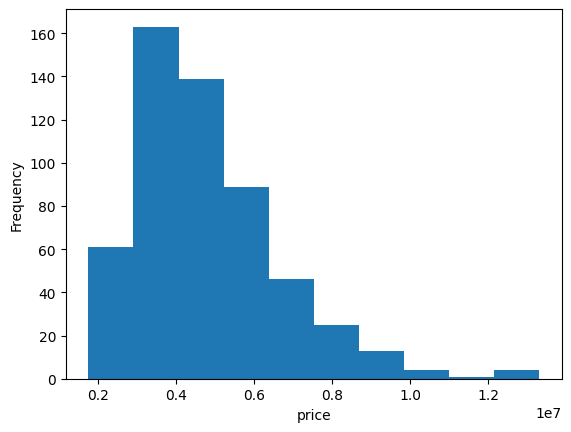

In [49]:
plt.hist(df['price'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

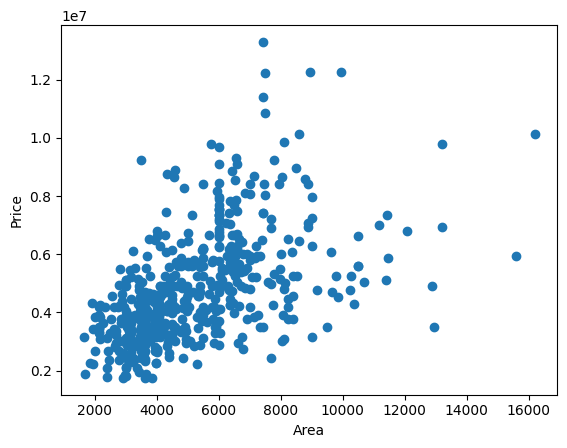

In [50]:
plt.scatter(df['area'],df['price'])
plt.xlabel('Area')
plt.ylabel('Price')

plt.show()

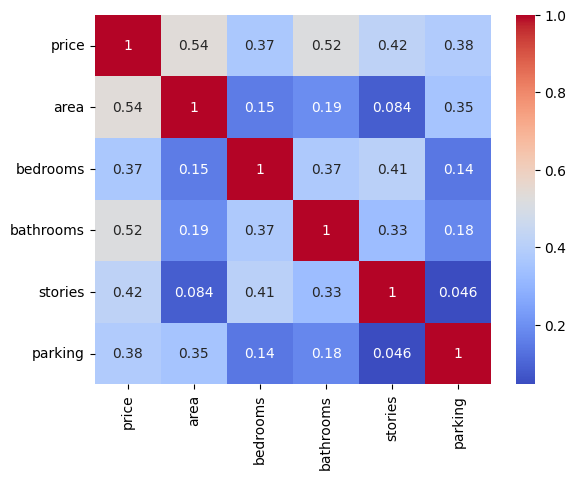

In [51]:
#correaltion between the columns
import seaborn as sns

# Calculate correlations on numerical columns only

correlation_matrix = df.corr(numeric_only= True)

# Create a heatmap

sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

c:\Users\yeswa\Envs\test\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


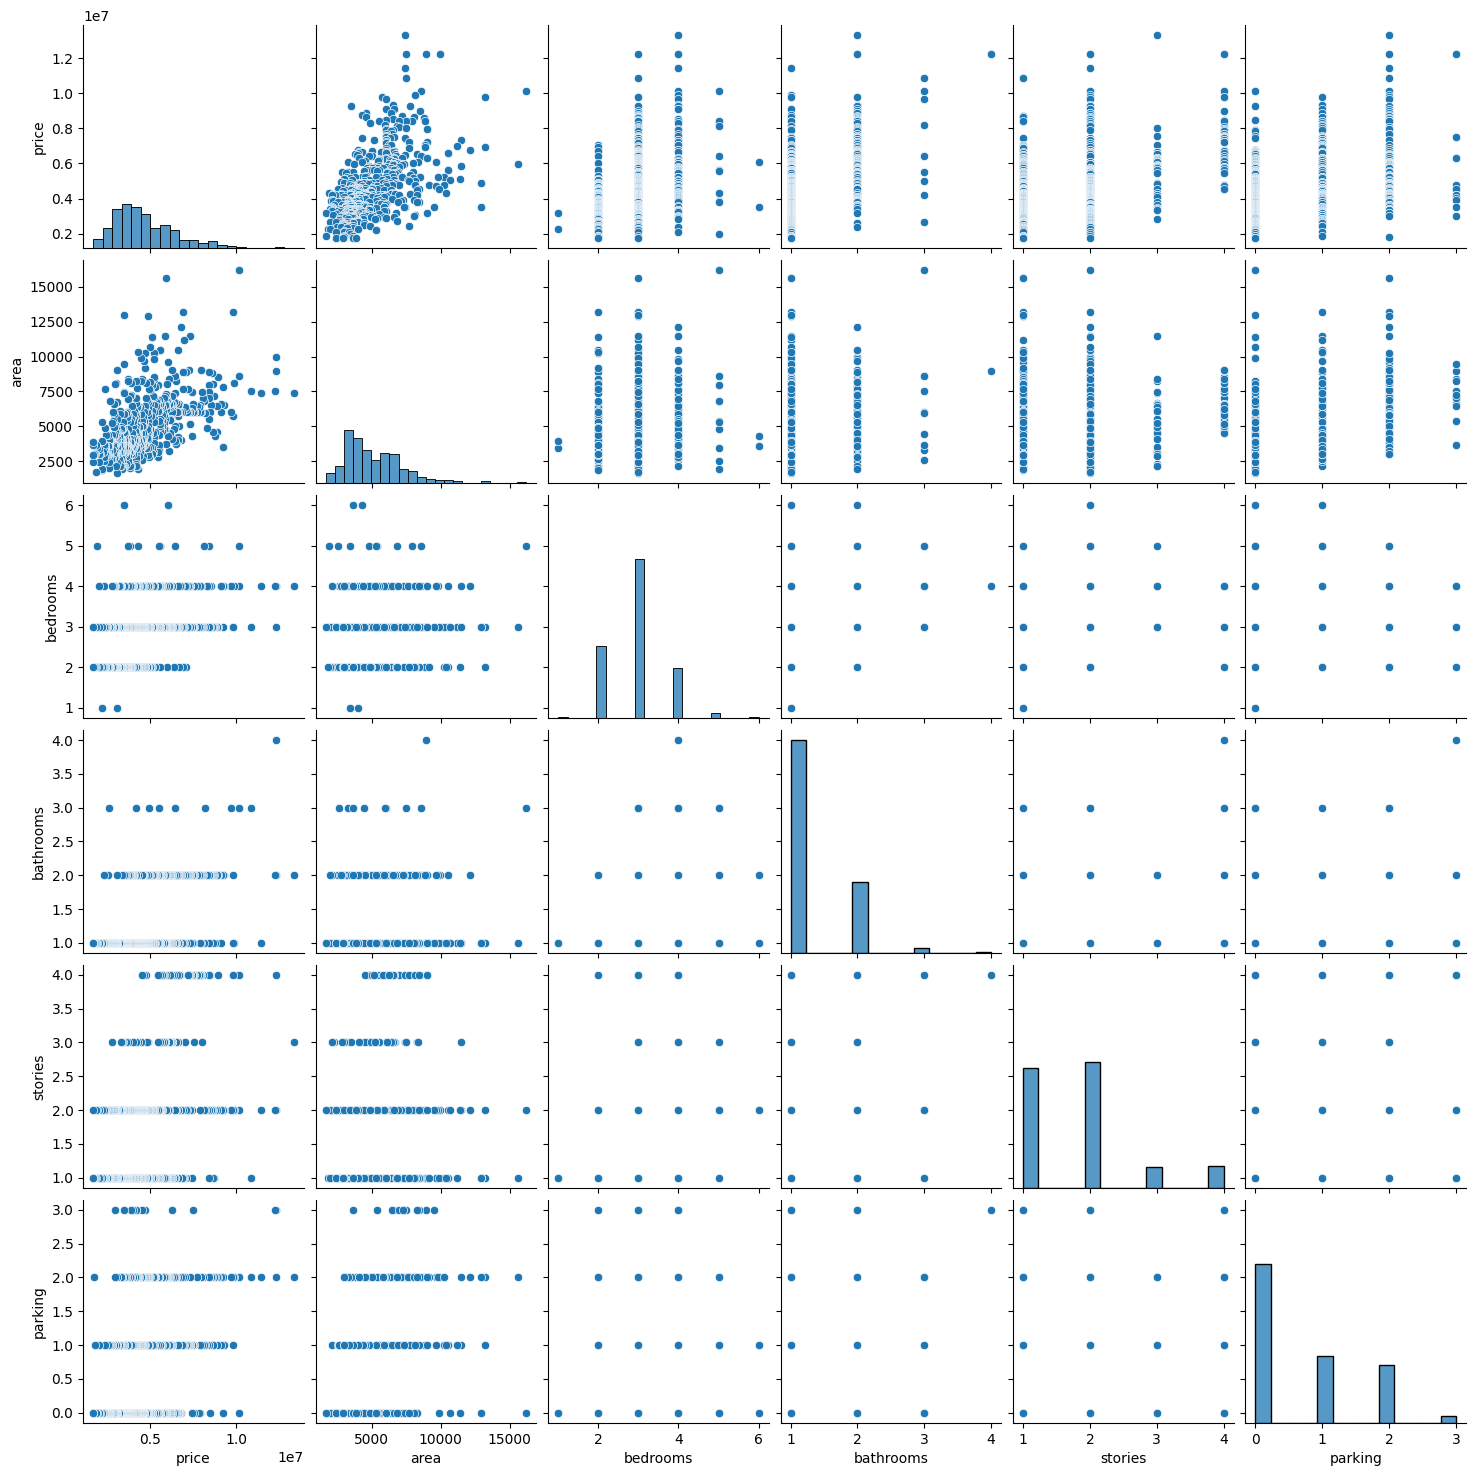

In [52]:
sns.pairplot(df)
plt.show()

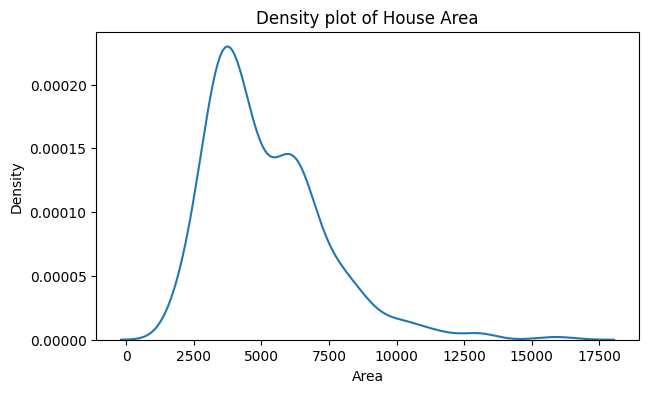

In [53]:
# Density plot of 'Area'
plt.figure(figsize=(7,4))
sns.kdeplot(df['area'])
plt.title('Density plot of House Area')
plt.xlabel('Area')
plt.ylabel('Density')
plt.show()

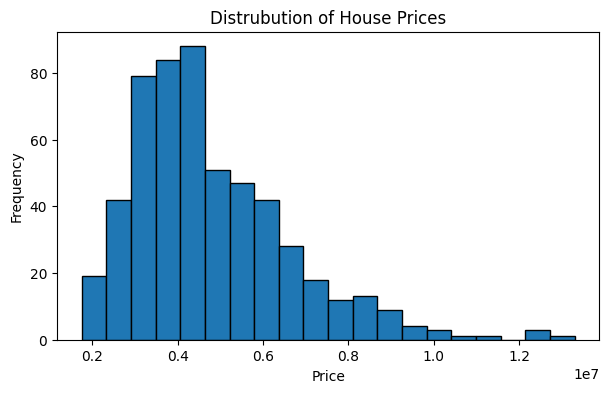

In [54]:
# Distrubution of House Prices'
plt.figure(figsize=(7,4))
plt.hist(df['price'],bins=20,edgecolor ='black')
plt.title('Distrubution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 9. Data Cleaning and Data Preparation

In our Dataset,Some columns in our dataset contains categorical variables with “yes” and “no” values. In such cases, it is often necessary to make changes to these columns for further analysis or modeling. Here are some inferences for handling these columns:

1. Handling Binary Categorical Variables:

        Some columns like ‘mainroad’, ‘guestroom’, ‘basement’, ‘hotwaterheating’, ‘airconditioning’, and‘prefarea’ have “yes” and “no” values. We’ll convert these into numbers: “yes” becomes 1, and “no” becomes 0. This change helps us use them as binary variables for analysis and modeling.

2. Creating Dummy Variables:

        The ‘furnishingstatus’ column shows how a house is furnished: “unfurnished”, “semi-furnished”, or “fully furnished”. To use this information in analysis and modeling, we’ll create dummy variables. Dummy variables are like switches: for each category, we’ll have a new column where 1 means that category is present, and 0 means it’s not. This lets us include furnishing status as valuable data for our analysis.

**9.0.1 1. Handling Binary Categorical Variables (Yes/No) Categories**


In [55]:
#Let Us print List of categorical columns containing 'yes' and 'no' values

categorical_columns = ['mainroad','guestroom','basement', 'hotwaterheating','airconditioning', 'prefarea']

df[categorical_columns]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [56]:
for col in categorical_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [57]:
df[categorical_columns]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


Now, the specified columns(i.e.., Categorical_columns) in our DataFrame have been converted to binary-encoded form(0,1). Remember, while **binary encoding** is suitable for these specific columns with only **two unique values**, for other **categorical variables** with more than two categories, you might want to consider techniques like **one-hot encoding**.

In [58]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


**9.0.2 2. Handling Categorical data with Dummy Variable**

In [59]:
df = pd.get_dummies(df, columns=['furnishingstatus'])

In [60]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,False,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,False,True,False
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,False,False,True
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,True,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,False,False,True


Now Again Mapping For True or False by binary encoding (0 and 1's)

In [61]:
binary_columns = ['furnishingstatus_furnished'	,'furnishingstatus_semi-furnished','furnishingstatus_unfurnished']
for col in binary_columns:
    df[col] = df[col].astype(int)  # Convert boolean to integer

In [62]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


furnished will be 00 and to avoid redudency we drop it. semi-furnished will be 10 and unfurnished will be 01

In [63]:
# Drop the 'furnishingstatus_furnished' column from the DataFrame
df.drop(['furnishingstatus_furnished'], axis=1, inplace=True)


Here, the first row with ‘semi-furnished’ and ‘unfurnished’ as both 0 indicates that it corresponds to the dropped category ‘furnished’. The presence or absence of ‘semi-furnished’ and ‘unfurnished’ is captured by the values in the respective dummy variables. 

By dropping the first category, we ensure linear independence among the dummy variables, which helps avoid multicollinearity and allows for proper interpretation of the coefficients associated with each category in the regression model.

In [64]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [65]:
from sklearn.preprocessing import MinMaxScaler


In [66]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# 10. Splitting data into Training and Testing data

**Split the data into training and testing subsets**

We could already feed our X and y data directly to our linear regression model, but if we use all of our data at once, how can we know if our results are any good? Just like in learning, what we will do, is use a part of the data to train our model and another part of it, to test it


This is easily achieved through the helper **train_test_split()** method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size.

train_test_split() helper method from from ***sklearn.model_selection import train_test_split***
  
test_size is the percentage of the overall data we'll be using for testing

 Some common train-test splits are  80/20 and 70/30. Here I use 80/20 

 random_state = SEED = Some Number(42) = Splitting data into training/validation/test sets: random seeds ensure that the data is divided the same way every time the code is run



In [67]:
df= pd.DataFrame(df)

In [68]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [69]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [70]:
y

0      1.000000
1      0.909091
2      0.909091
3      0.906061
4      0.836364
         ...   
540    0.006061
541    0.001485
542    0.000000
543    0.000000
544    0.000000
Name: 0, Length: 545, dtype: float64

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
print(X_test)

           1    2         3         4    5    6    7    8    9         10  \
333  0.092784  0.4  0.000000  0.333333  1.0  0.0  0.0  0.0  0.0  0.000000   
84   0.145017  0.4  0.000000  0.333333  1.0  0.0  0.0  1.0  0.0  0.666667   
439  0.156701  0.2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   
396  0.136770  0.2  0.000000  0.000000  1.0  0.0  0.0  0.0  0.0  0.333333   
161  0.305842  0.4  0.000000  0.666667  1.0  1.0  0.0  0.0  1.0  0.000000   
..        ...  ...       ...       ...  ...  ...  ...  ...  ...       ...   
100  0.340206  0.4  0.333333  0.000000  1.0  0.0  1.0  0.0  1.0  0.000000   
344  0.151203  0.2  0.000000  0.000000  1.0  0.0  0.0  0.0  0.0  0.000000   
176  0.472165  0.4  0.000000  0.000000  1.0  0.0  0.0  0.0  1.0  0.666667   
244  0.252234  0.4  0.000000  0.333333  1.0  1.0  1.0  0.0  0.0  0.000000   
15   0.298969  0.6  0.000000  0.333333  1.0  0.0  1.0  0.0  0.0  0.666667   

      11   12   13  
333  0.0  1.0  0.0  
84   0.0  1.0  0.0  
439  0.0  0.

In [73]:
print(X_train)

           1    2    3         4    5    6    7    8    9         10   11  \
412  0.065979  0.4  0.0  0.333333  1.0  0.0  1.0  0.0  0.0  0.000000  1.0   
284  0.420619  0.2  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  0.333333  0.0   
504  0.105498  0.2  0.0  0.000000  1.0  0.0  0.0  0.0  1.0  0.000000  0.0   
209  0.348454  0.4  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  0.000000  0.0   
269  0.154639  0.4  0.0  0.333333  1.0  0.0  0.0  0.0  0.0  0.000000  0.0   
..        ...  ...  ...       ...  ...  ...  ...  ...  ...       ...  ...   
299  0.367698  0.4  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  1.000000  0.0   
534  0.092784  0.6  0.0  0.333333  1.0  0.0  0.0  0.0  0.0  0.000000  0.0   
493  0.158763  0.4  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  0.000000  0.0   
527  0.012784  0.2  0.0  0.000000  0.0  0.0  1.0  0.0  0.0  0.000000  0.0   
168  0.179381  0.6  0.0  0.333333  1.0  0.0  1.0  0.0  1.0  0.000000  0.0   

      12   13  
412  0.0  1.0  
284  0.0  0.0  
504  0.0  1.0  
209  0.0  1

In [74]:
print(y_test)

333    0.187879
84     0.412121
439    0.130303
396    0.151515
161    0.321212
         ...   
100    0.387879
344    0.181818
176    0.303030
244    0.242424
15     0.636364
Name: 0, Length: 109, dtype: float64


In [75]:
print(y_test)

333    0.187879
84     0.412121
439    0.130303
396    0.151515
161    0.321212
         ...   
100    0.387879
344    0.181818
176    0.303030
244    0.242424
15     0.636364
Name: 0, Length: 109, dtype: float64


In [76]:
(X_test).shape,(X_train).shape

((109, 13), (436, 13))

# 11. Training the Model

In [77]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [78]:
reg.coef_

array([ 0.31068352,  0.02319068,  0.24464129,  0.11893479,  0.03383667,
        0.03044028,  0.03354944,  0.07204554,  0.07532778,  0.07057929,
        0.06217622, -0.0034641 , -0.04554366])

In [79]:
reg.intercept_

0.03217896366567116

# 12 Testing the Model

In [80]:
y_pred = reg.predict(X_test)

In [81]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted Value': y_pred})
print(df_pred)

       Actual  Predicted Value
333  0.187879         0.140299
84   0.412121         0.275626
439  0.130303         0.039958
396  0.151515         0.133208
161  0.321212         0.414082
..        ...              ...
100  0.387879         0.388045
344  0.181818         0.114166
176  0.303030         0.344366
244  0.242424         0.316004
15   0.636364         0.289598

[109 rows x 2 columns]


In [82]:
df_pred.head()

,Actual,Predicted Value
333,0.187879,0.140299
84,0.412121,0.275626
439,0.130303,0.039958
396,0.151515,0.133208
161,0.321212,0.414082


# 13. Evaluation of Model


In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [84]:
print(mae)
print(mse)
print(rmse)

0.07562337802116945
0.009847518681153328
0.09923466471527642


In [85]:
from sklearn.metrics import r2_score

In [86]:
print(r2_score(y_test,y_pred))

0.629851860887224


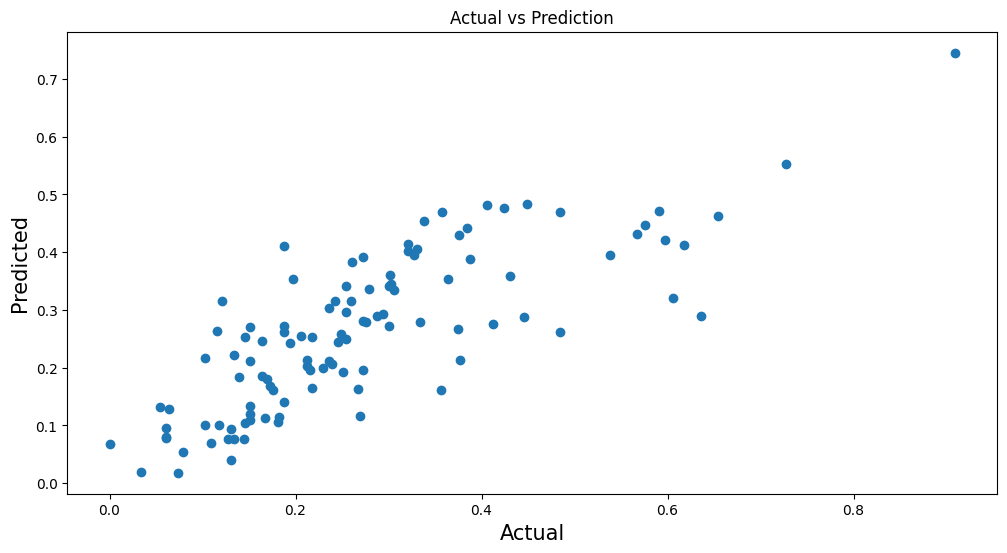

In [87]:
# Create a new figure with subplots
fig, (ax1) = plt.subplots(1, figsize=(12, 6))

# Scatter plot of actual versus predicted values on the first subplot
ax1.scatter(y_test, y_pred)
ax1.set_title('Actual vs Prediction')
ax1.set_xlabel('Actual', fontsize=15)
ax1.set_ylabel('Predicted', fontsize=15)

# Show the plot
plt.show() 